# Classify MNIST digits dataset

In [20]:
random_state = 0

In [6]:
import numpy as np
import os
import matplotlib.pyplot as plt
from time import time
# might need this when run remotely on the server
# import ssl

# ssl._create_default_https_context = ssl._create_unverified_context    

In [19]:
from neuralnet import NeuralNetMLP

In [9]:
data_dir = os.path.join('data', 'mnist_digits')
os.listdir(data_dir)

['mnist_scaled.npz', 'downloads', 'unpacked']

## Load data

In [13]:
t = time()
mnist = np.load(os.path.join(data_dir, 'mnist_scaled.npz'))
elapsed = time() - t
print("Data loaded, took {0:,.2f} seconds ({1:,.2f} minutes)".format(elapsed, elapsed / 60))

Data loaded, took 0.00 seconds (0.00 minutes)


In [14]:
mnist.files

['X_train', 'y_train', 'X_test', 'y_test']

In [15]:
X_train, y_train, X_test, y_test = [mnist[f] for f in mnist.files]

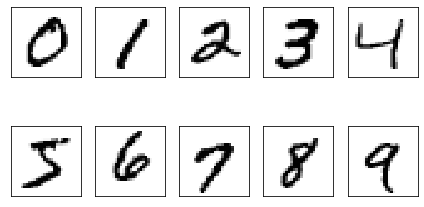

In [16]:
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

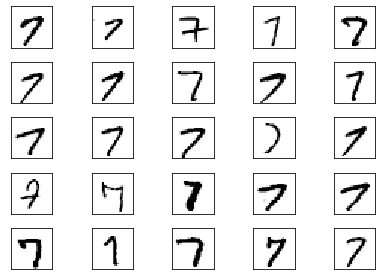

In [17]:
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(25):
    img = X_train[y_train == 7][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

## Multilayer perceptron (MLP)

Initialize a new 784-100-10 MLP—a neural network with 784 input units (`n_features`), 100 hidden units (`n_hidden`), and 10 output units (`n_output`).

In [21]:
nn = NeuralNetMLP(n_hidden=100,
                  l2=0.01,
                  epochs=200,
                  eta=0.0005,
                  minibatch_size=100,
                  shuffle=True,
                  seed=random_state)
nn

In [23]:
t = time()
nn.fit(X_train=X_train[:55000],
       y_train=y_train[:55000],
       X_valid=X_train[55000:],
       y_valid=y_train[55000:])
elapsed = time() - t
print("Model fit, took {0:,.2f} seconds ({1:,.2f} minutes)".format(elapsed, elapsed / 60))

200/200 | Cost: 5095.30 | Train/Valid Acc.: 99.30%/97.88%  

Model fit, took 321.57 seconds (5.36 minutes)


### Plot cost over epochs

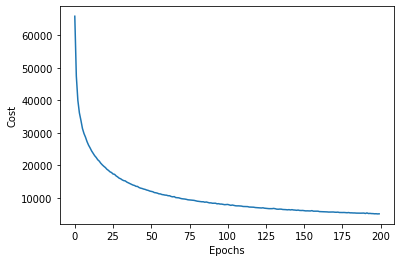

In [24]:
plt.plot(range(nn.epochs), nn.eval_['cost'])
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.show()

### Plot training and validation accuracy

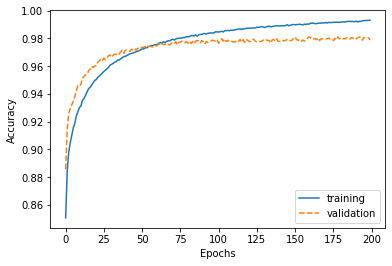

In [25]:
plt.plot(range(nn.epochs), nn.eval_['train_acc'], label='training')
plt.plot(range(nn.epochs), nn.eval_['valid_acc'], label='validation', linestyle='--')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

At approximately the 50th epoch, the training and validation accuracy values are equal, and then, the network starts overfitting the training data.

One way to decrease the effect of overfitting is to increase the regularization strength—for example, by setting `l2=0.1`. Another useful technique to tackle overfitting in neural networks is dropout.

### Evaluating generalization performance of the trained model

In [26]:
y_test_pred = nn.predict(X_test)
acc = (np.sum(y_test == y_test_pred).astype(np.float) / X_test.shape[0])
print('Test accuracy: {0:,.2f}'.format(acc * 100))

Training accuracy: 97.53


Our relatively simple one-hidden layer neural network achieved a relatively good performance on the test dataset, similar to the validation set accuracy (97.88 percent).

### Examples of correctly classified samples

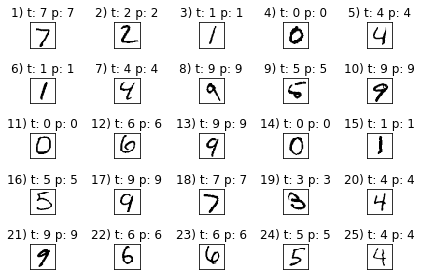

In [29]:
miscl_img = X_test[y_test == y_test_pred][:25]
correct_lab = y_test[y_test == y_test_pred][:25]
miscl_lab= y_test_pred[y_test == y_test_pred][:25]

fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(25):
    img = miscl_img[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('{0}) t: {1} p: {2}'.format(i+1, correct_lab[i], miscl_lab[i]))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

### Examples of misclassified samples

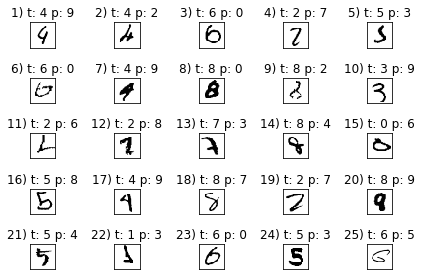

In [28]:
miscl_img = X_test[y_test != y_test_pred][:25]
correct_lab = y_test[y_test != y_test_pred][:25]
miscl_lab= y_test_pred[y_test != y_test_pred][:25]

fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(25):
    img = miscl_img[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('{0}) t: {1} p: {2}'.format(i+1, correct_lab[i], miscl_lab[i]))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()